# Part 1: Data preprocessing

dataset source:https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

1. Importing the libraries
2. Importing the dataset
3. Dealing with missing data
4. Encoding categorical variables
5. Splitting the dataset into train and test set
6. Feature scaling

## Importing the libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import shap
# print the JS visualization code to the notebook
shap.initjs()

In [ ]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 10.4 MB/s eta 0:00:00


In [ ]:
!pip install scikit-optimize


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 3.9 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving breast cancer kaggle.csv to breast cancer kaggle.csv


In [ ]:
from skopt import BayesSearchCV

In [ ]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['breast cancer kaggle.csv']))

## Data exploration

In [ ]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
dataset.shape

(569, 33)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
dataset = dataset.drop(columns='Unnamed: 32')

In [ ]:
# Statistical summary
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Dealing with the missing data

In [ ]:
# check if there are any null values
dataset.isnull().values.any()

False

In [ ]:
# check how many null values
dataset.isnull().values.sum()

0

## Encoding the categorical data

In [ ]:
dataset.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [ ]:
dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
dataset['diagnosis'].nunique()

2

In [ ]:
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [ ]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
dataset.shape

(569, 32)

## Countplot

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


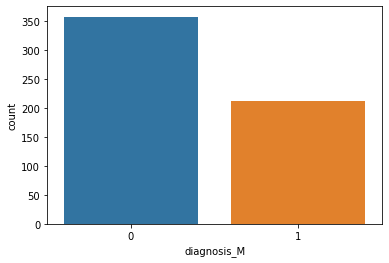

In [ ]:
sns.countplot(dataset['diagnosis_M'], label='Count')
plt.show()

In [ ]:
# benign (B) values
(dataset.diagnosis_M == 0).sum()

357

In [ ]:
# malignant (M) values
(dataset.diagnosis_M == 1).sum()

212

## Correlation matrix and Heatmap

In [ ]:
dataset_2 = dataset.drop(columns='diagnosis_M')

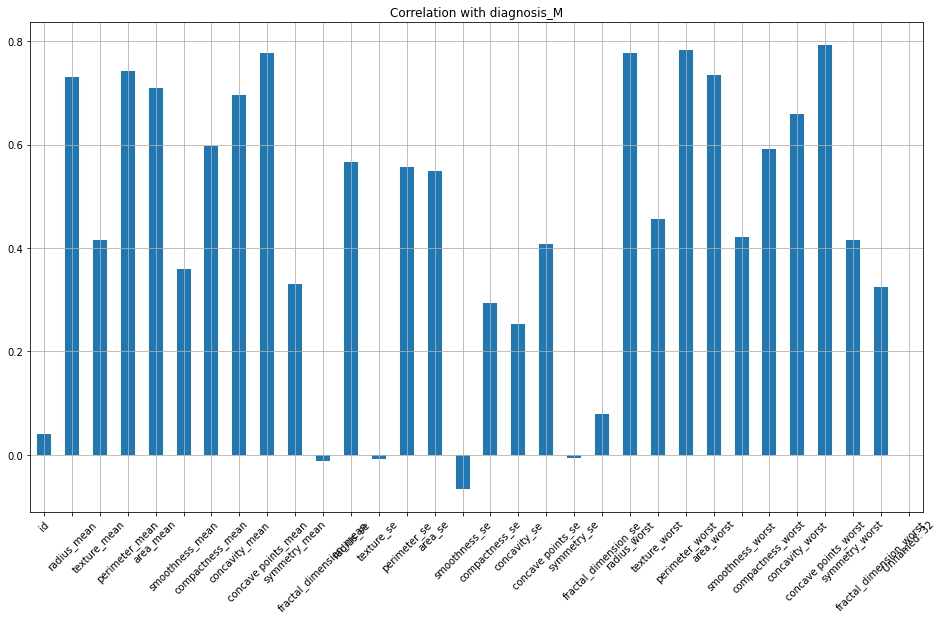

In [ ]:
dataset_2.corrwith(dataset['diagnosis_M']).plot.bar(
    figsize=(16,9), title = 'Correlation with diagnosis_M', 
    rot = 45, grid = True
)

In [ ]:
# Create Correlation Matrix
corr = dataset.corr()

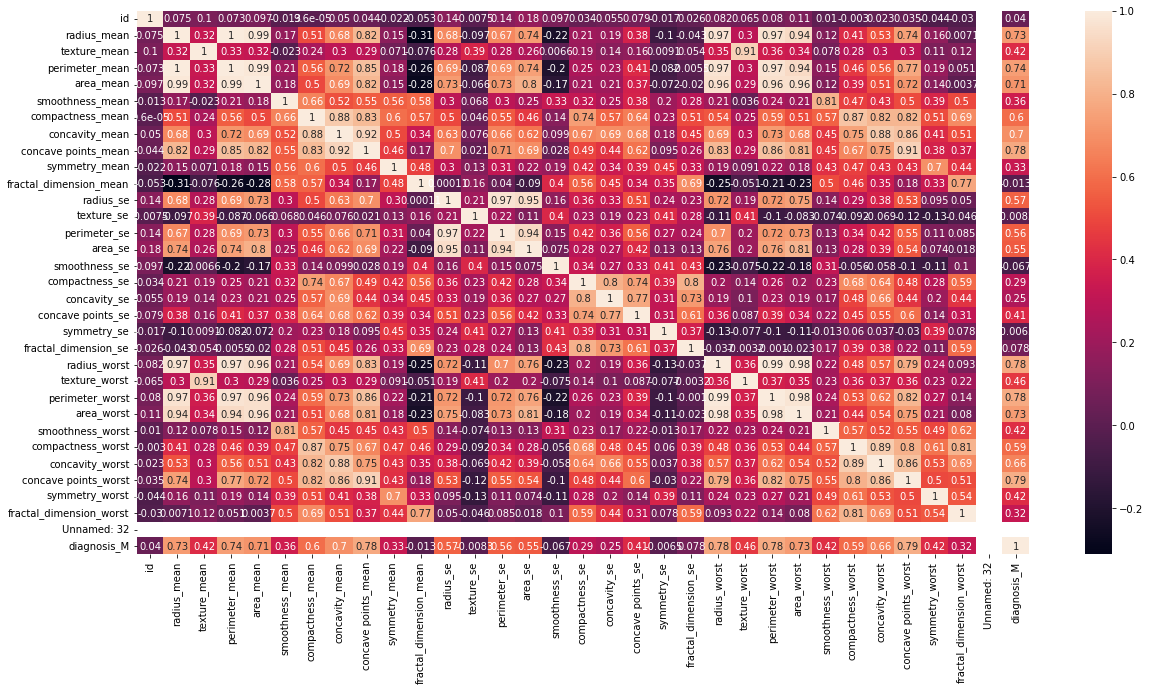

In [ ]:
# Check the correlation between variables 

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

## Splitting the dataset into train and test set

In [ ]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
# matrix of features / independent variables


x = dataset.iloc[:, 1:-1]
xcol = dataset.iloc[:, 1:-1].columns
columnname = pd.DataFrame(xcol)

In [ ]:
# dependent variable
y = dataset.iloc[:, -1].values

In [ ]:
x.shape

(569, 30)

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

invalid value encountered in true_divide
invalid value encountered in true_divide
invalid value encountered in true_divide


# Part 2: Building the model

## 1) XGboost


In [ ]:
from xgboost import XGBClassifier, plot_importance
classifier_xgb = XGBClassifier(
    objective= 'binary:logistic',  booster='gbtree',
                          eval_metric='auc')

classifier_xgb.fit(x_train, y_train)

XGBClassifier(eval_metric='auc')

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_xgb, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 95.60 %
Standard Deviation is 2.97 %


In [ ]:
y_pred = classifier_xgb.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results  = pd.DataFrame([['XGBoost', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[66  1]
 [ 2 45]]


## 3) Hyperparamter tuning XGboost



## Part 1: Applying GridsearchCV


In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
parameters = {"subsample":[0.75, 1],  "colsample_bytree":[0.75, 1], "max_depth":[2, 6], "min_child_weight":[1, 5],"learning_rate":[0.1, 0.01]}


In [ ]:
grid_search = GridSearchCV(
    estimator=classifier_xgb ,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [ ]:
print(grid_search)

GridSearchCV(cv=10, estimator=XGBClassifier(eval_metric='auc'), n_jobs=10,
             param_grid={'colsample_bytree': [0.75, 1],
                         'learning_rate': [0.1, 0.01], 'max_depth': [2, 6],
                         'min_child_weight': [1, 5], 'subsample': [0.75, 1]},
             scoring='roc_auc', verbose=True)


In [ ]:
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=XGBClassifier(eval_metric='auc'), n_jobs=10,
             param_grid={'colsample_bytree': [0.75, 1],
                         'learning_rate': [0.1, 0.01], 'max_depth': [2, 6],
                         'min_child_weight': [1, 5], 'subsample': [0.75, 1]},
             scoring='roc_auc', verbose=True)

In [ ]:
grid_search.best_estimator_

XGBClassifier(eval_metric='auc', max_depth=2, subsample=0.75)

In [ ]:
grid_search.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 2,
 'min_child_weight': 1,
 'subsample': 0.75}

### Final model construction XGBoost using Gridsearch



In [ ]:
classifier_final_gridsearch = XGBClassifier(colsample_bytree =0.75,
 learning_rate = 0.1,
 max_depth = 6,
 min_child_weight = 1,
 subsample = 0.75)
classifier_final_gridsearch.fit(x_train, y_train)

XGBClassifier(colsample_bytree=0.75, max_depth=6, subsample=0.75)

In [ ]:
y_pred = classifier_final_gridsearch.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['XGBoost Gridsearch', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,XGBoost Gridsearch,0.982456,0.978723,0.978723,0.978723


## Part 2 Randomizedsearch for XGBoost


In [ ]:
parameters_randomserachCV = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}


In [ ]:
randomized_search = RandomizedSearchCV(estimator=classifier_xgb ,
    param_distributions=parameters_randomserachCV,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True)

In [ ]:
randomized_search.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=XGBClassifier(eval_metric='auc'), n_jobs=10,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=True)

In [ ]:
randomized_search.best_params_

{'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.3,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

## Final model construction of XGBoost using Randomized search



In [ ]:
classifier_randomsearch =  XGBClassifier(min_child_weight= 1,
 max_depth= 10,
 learning_rate= 0.25,
 gamma= 0.0,
 colsample_bytree= 0.4)
classifier_randomsearch.fit(x_train, y_train)

XGBClassifier(colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=10)

In [ ]:
classifier_randomsearch.fit(x_train, y_train)

XGBClassifier(colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=10)

In [ ]:
y_pred = classifier_randomsearch.predict(x_test)

acc1 = accuracy_score(y_test, y_pred)
prec1 = precision_score(y_test, y_pred)
rec1 = recall_score(y_test, y_pred)
f11 = f1_score(y_test, y_pred)

#model_results = pd.DataFrame([['XGBboost randomsearch', acc1, prec1, rec1, f11]],
             #  columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
list1 = [['XGBboost randomsearch', acc1, prec1, rec1, f11]]
model_results = model_results.append(pd.DataFrame( list1,
               columns=[ 'Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']),
               ignore_index = True)
print(model_results)

                   Model  Accuracy  Precision    Recall  F1 Score
0     XGBoost Gridsearch  0.982456   0.978723  0.978723  0.978723
1  XGBboost randomsearch  0.973684   0.978261  0.957447  0.967742


## Part 3 Bayesian search for XGBoost

In [ ]:
parameter_bayesianCV = {
    'max_depth': (5, 20),
    'learning_rate': (0, 1),
    'n_estimators' : (10,100),
    'gamma': (0,1),
    'min_child_weight' :(1,10),
    'subsample' :(0.75, 1)

}


In [ ]:
classifier_bayesianCV = BayesSearchCV(estimator=classifier_xgb ,
  search_spaces=parameter_bayesianCV,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True)

In [ ]:
classifier_bayesianCV.fit(x_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

The objective has been evaluated at this point before.


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


The objective has been evaluated at this point before.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


The objective has been evaluated at this point before.


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


The objective has been evaluated at this point before.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


The objective has been evaluated at this point before.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


The objective has been evaluated at this point before.


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


The objective has been evaluated at this point before.


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


The objective has been evaluated at this point before.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


The objective has been evaluated at this point before.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


The objective has been evaluated at this point before.


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


The objective has been evaluated at this point before.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


The objective has been evaluated at this point before.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


BayesSearchCV(cv=10, estimator=XGBClassifier(eval_metric='auc'), n_jobs=10,
              scoring='roc_auc',
              search_spaces={'gamma': (0, 1), 'learning_rate': (0, 1),
                             'max_depth': (5, 20), 'min_child_weight': (1, 10),
                             'n_estimators': (10, 100),
                             'subsample': (0.75, 1)},
              verbose=True)

Final model construction of Xgboost using Bayesian search


In [ ]:
y_pred = classifier_bayesianCV.predict(x_test)

acc2 = accuracy_score(y_test, y_pred)
prec2 = precision_score(y_test, y_pred)
rec2 = recall_score(y_test, y_pred)
f12 = f1_score(y_test, y_pred)

list2 = [['XGBboost Bayesiansearch', acc2, prec2, rec2, f12]]
model_results = model_results.append(pd.DataFrame( list2,
               columns=[ 'Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']),
               ignore_index = True)
print(model_results)

                     Model  Accuracy  Precision    Recall  F1 Score
0       XGBoost Gridsearch  0.982456   0.978723  0.978723  0.978723
1  XGBboost Bayesiansearch  0.973684   0.978261  0.957447  0.967742


**Classic feature attributions**





# Part 3  Model Explanation

**Classic approach**

Here we try out the global feature importance calcuations that come with XGBoostGridsearch model created above. This method of finding feature importance may generate contradictory scores hence, a more robust method called SHAP is used to compute feature attributions in following codes. 




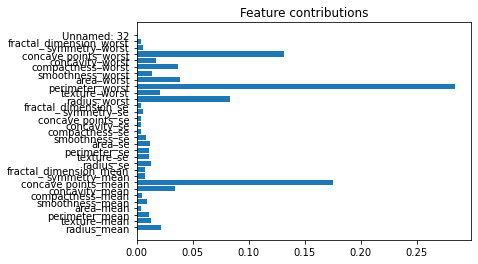

In [ ]:
plt.barh(xcol,classifier_final_gridsearch.feature_importances_)

plt.title("Feature contributions")
plt.show()


**Explain predictions using SHAP**

With SHAP, we can use two types of model interpretability namely:

1. Global 

Under this method, we use SHAP values to find the importance of features in predicting the outcome. SHAP supports several visualizations to showcase attribute contributions. 

1.1 Using "shap.summary_plot" function with plot_type=”bar”  produces the variable importance plot. The top variables projected on the plot  contributes more to the model than the bottom ones.

1.2 Simply using  "shap.summary_plot" generates an interesting plot that shows following four characteristics about the model prediction

  1.2.1 Feature importance: Variables are ranked in  descending order.

  1.2.2 Impact: The horizontal location shows the impact(low or high) on the prediction

  1.2.3 Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.
  
  1.2.4 Correlation: it indicates high or low correlation of feature with outcome.  The “high” comes from the red color, and the “positive” impact is shown by the X-axis. The "low: comes from blue color, and the "negative" impact is shown by the X-axis. 

1.3 SHAP Dependence Plot 

It tells whether the relationship between the target and a feature is linear, monotonic or more complex. This plot automatically picks one additional feature from the data set based on its interactions with this selected feature. The plot will produce n plots where, n is the number of independent features present in the data set. Under this plot, SHAP values are represented by Y-axis. X-axis indicates the feature.  The auto selected feature is represented by a color line parallel to Y-axis. Every data point representing value of the feature is shown by a dot on the graph. Collection of dots may indicate a pattern (linear, non linear or complex) with the outcome feature. The dot color indicates its relational strength with the discoverd feature. 

2. Local

It supports explainability for any individual observation present in the data set for which model has made the prediction.

**1 Global explanation**


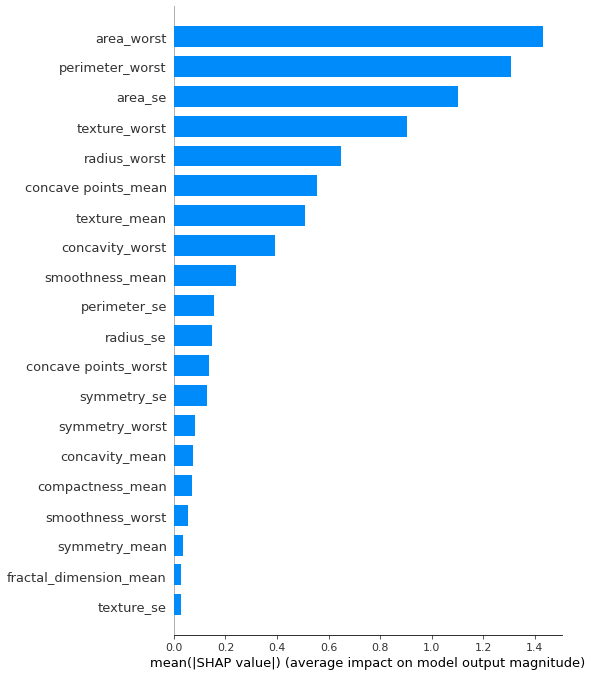

In [ ]:
# a simple explanation of contribution of features in making decision
explainer = shap.TreeExplainer(classifier_final_gridsearch)
shap_values = explainer.shap_values(x,xcol)
shap.summary_plot(shap_values,x, xcol, plot_type="bar")

The top two important features  in making predicting breast cancer are area_worst and perimerter_worst. 

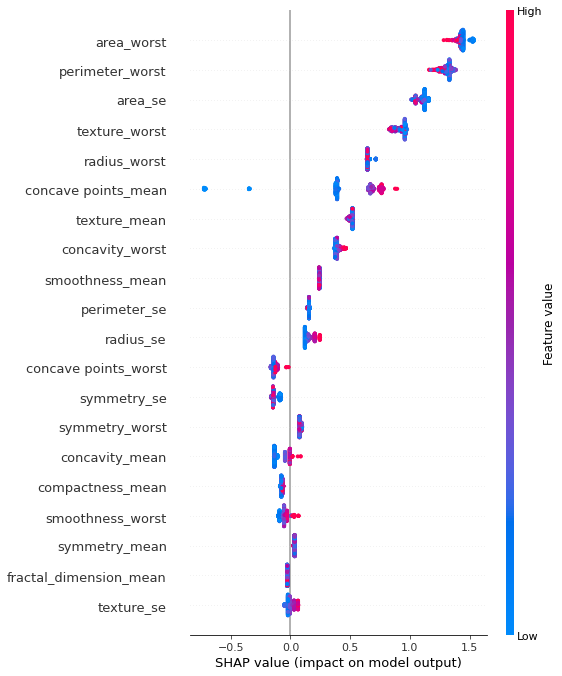

In [ ]:
# detailed explanation in terms of importance, impact and correlation of features 
shap.summary_plot(shap_values,x, xcol)

feature area_worst has combination of high and low values ,has a positive relation and is the most important feature in predicting breast cancer in given data set. On the other hand, fractal_dimension_se is the least important feature carrying low values and is positively correlated with the outcome. 

31


invalid value encountered in true_divide
invalid value encountered in true_divide


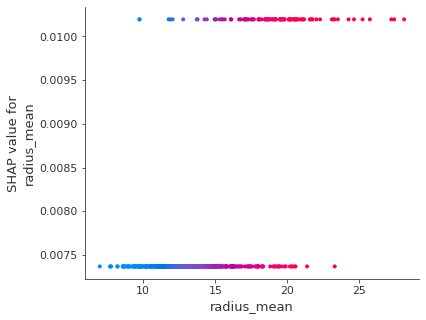

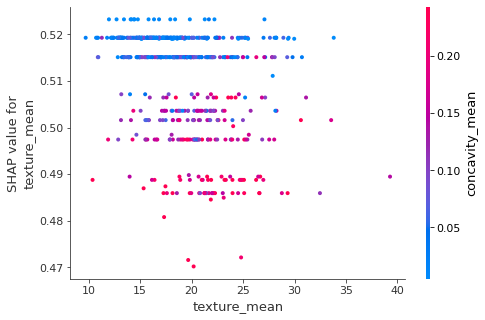

invalid value encountered in true_divide
invalid value encountered in true_divide
All-NaN slice encountered
invalid value encountered in double_scalars


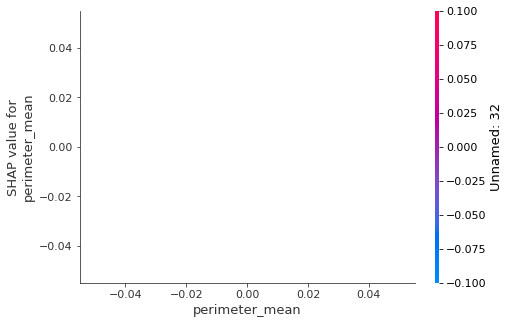

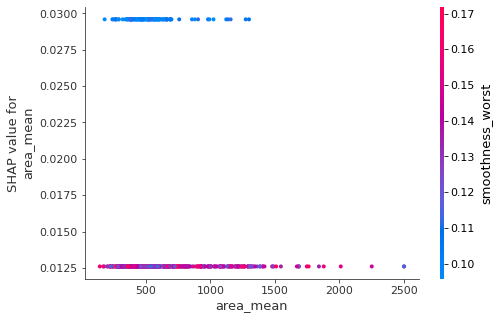

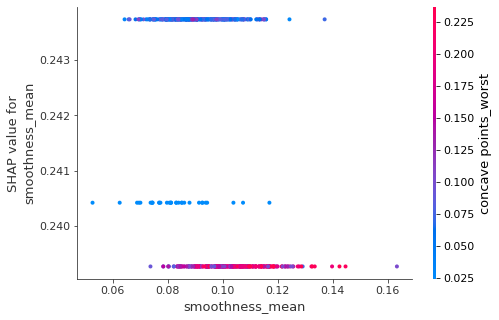

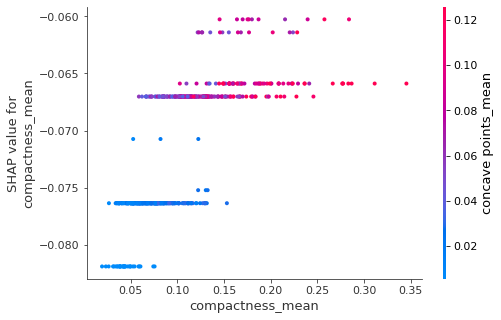

invalid value encountered in true_divide
invalid value encountered in true_divide
All-NaN slice encountered
invalid value encountered in double_scalars


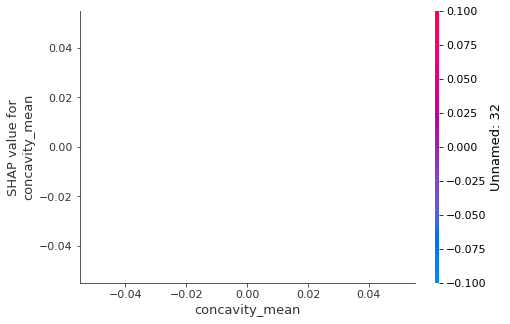

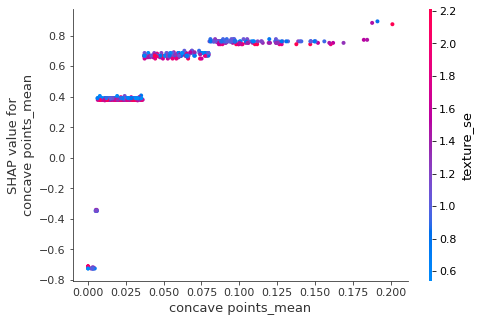

invalid value encountered in true_divide
invalid value encountered in true_divide
All-NaN slice encountered
invalid value encountered in double_scalars


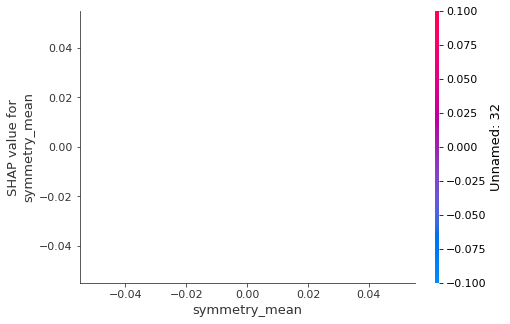

invalid value encountered in true_divide
invalid value encountered in true_divide
All-NaN slice encountered
invalid value encountered in double_scalars


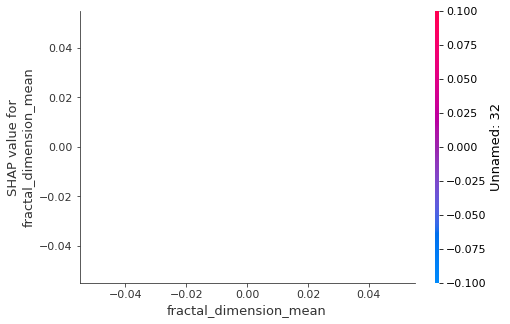

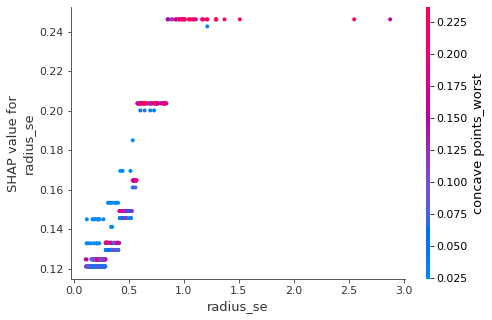

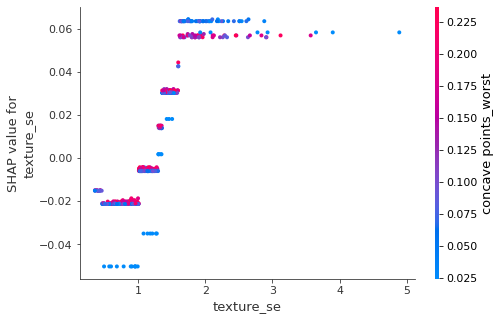

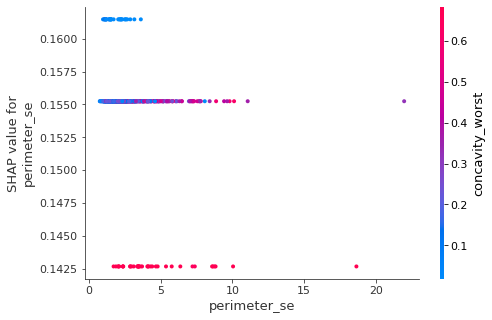

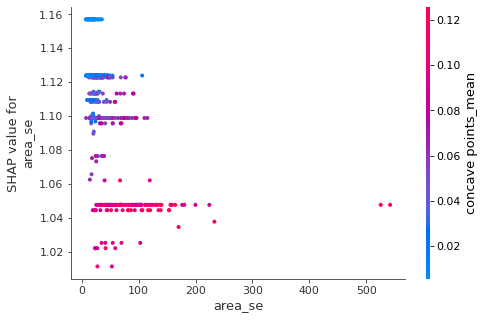

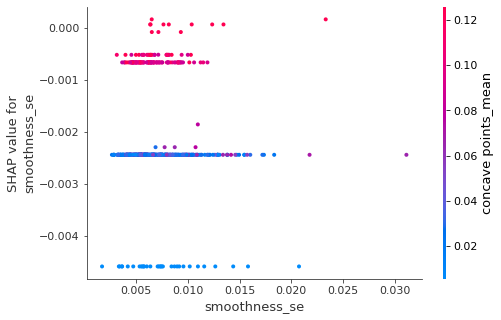

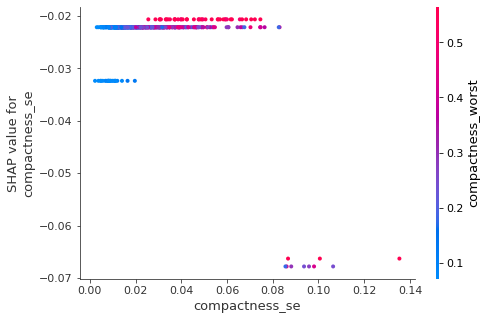

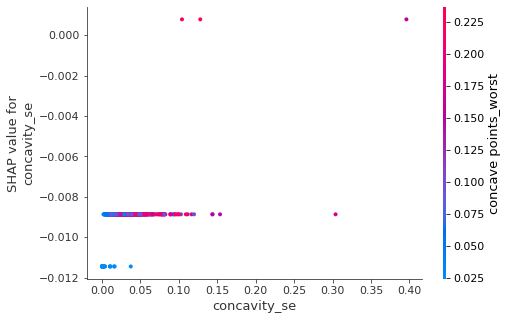

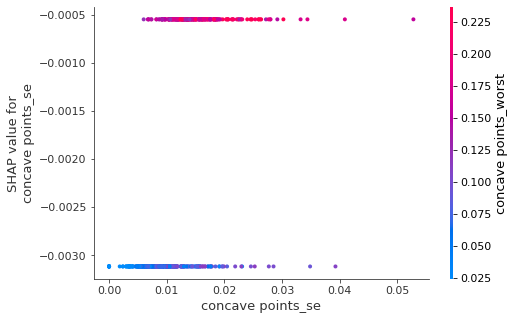

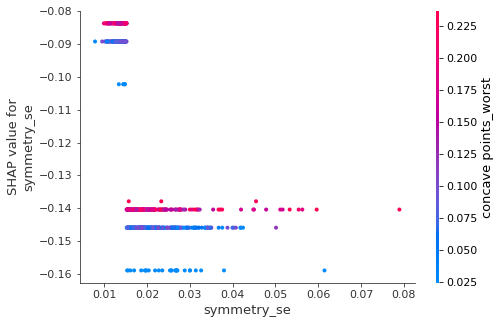

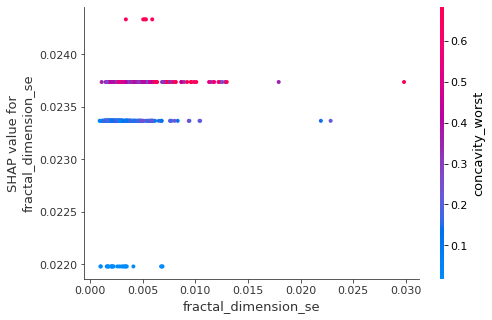

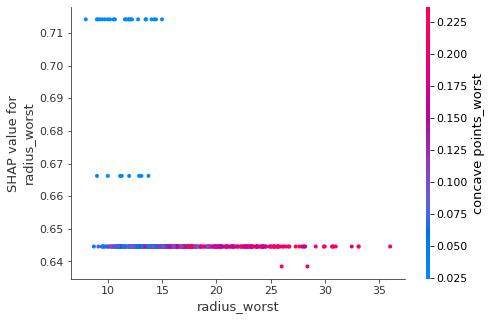

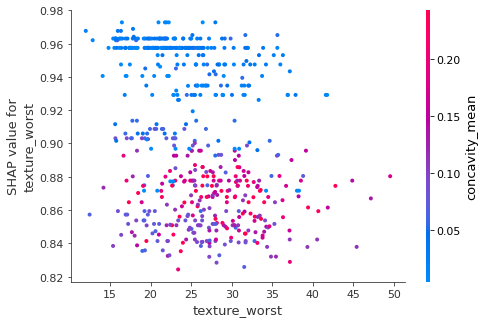

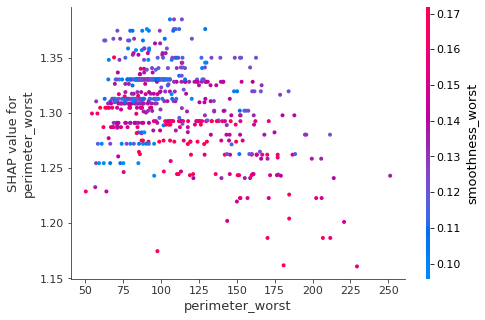

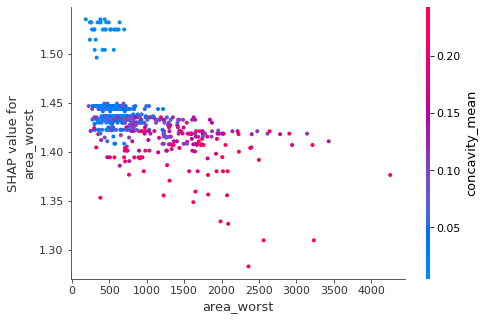

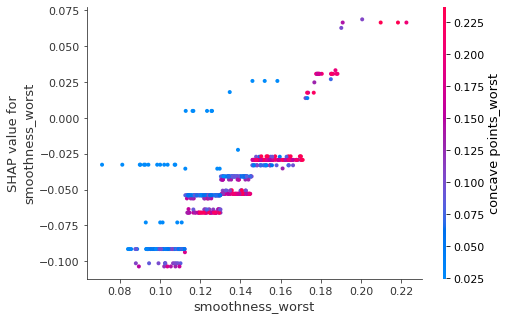

invalid value encountered in true_divide
invalid value encountered in true_divide
All-NaN slice encountered
invalid value encountered in double_scalars


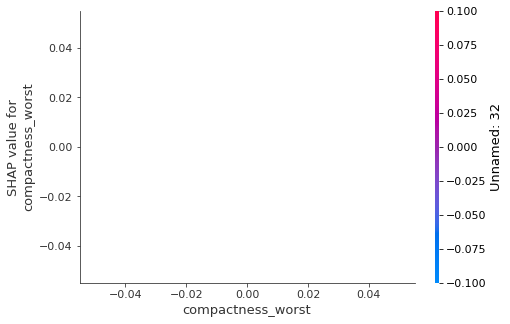

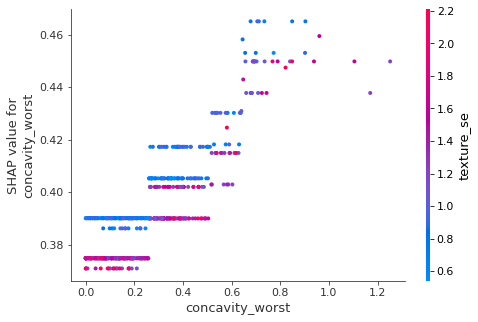

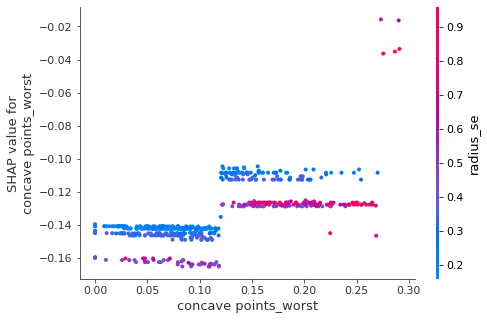

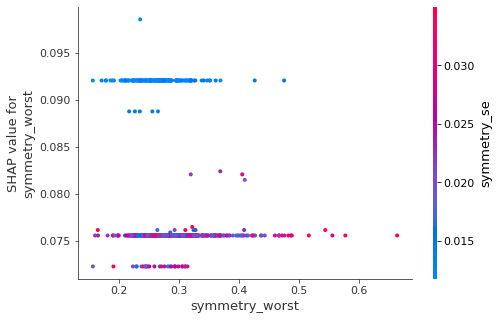

invalid value encountered in true_divide
invalid value encountered in true_divide
All-NaN slice encountered
invalid value encountered in double_scalars


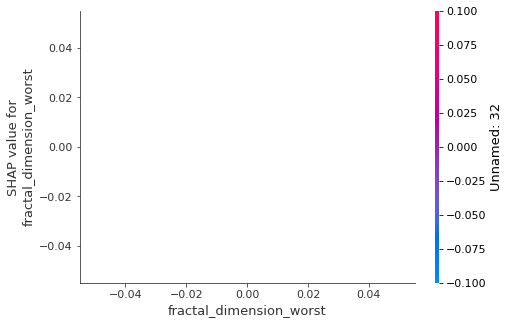

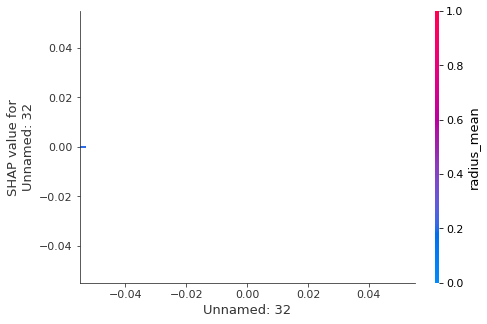

In [ ]:
print(len(columnname))
for index in range(0, len(columnname)):
  shap.dependence_plot(index, shap_values, x)
  

There is a non linear relationship between area_worst and outcome feature. Low value of feature area_worst has maximum contribution in making decision. This feature has maximum interaction with feature concave_feature_mean. Lower value of features concave_feature_mean and area_worst is best combination to predict breat cancer

**2. Local explanation** 

Local explanation with SHAP helps in understanding why a given prediction was made by the model on a particular data point in the data set. SHAP supports visualization of reason for its decision which can applied on observation present in the data set. Looking at the visualization explains the reason and understanding on the prediction outcome. 

In [ ]:
xtextdataFrame = pd.DataFrame(x_test, columns = xcol)
ytextdataFrame = pd.DataFrame(y_test)
print("the class of first observation", ytextdataFrame.iloc[1,0])

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], xtextdataFrame.iloc[0,:], link="logit")


the class of first observation 0


That is a plot of a patient who had cancer. The plot shows increased values of certain features resulted in cancer

In [ ]:
print("the class of first observation", ytextdataFrame.iloc[2,0])

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1,:], xtextdataFrame.iloc[1,:], link="logit")


the class of first observation 0


That is  a plot of a non cancerous patient . The plot shows higher negative values of certain features resulted non cancer. 